In [1]:
!pip install seaborn
!pip install pyspark
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install webdriverdownloader
!pip install selenium
!pip install validators
!pip install numpy
!pip install validators
!pip install gensim
!pip install pyldavis

  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Processing /Users/jzapatam/Library/Caches/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89/pyLDAvis-2.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829 kB 250 kB/s eta 0:00:01
     |████████████████████████████████| 186 kB 3.2 MB/s eta 0:00:01
Processing /Users/jzapatam/Library/Caches/pip/wheels/3c/33/97/805b282e129f60bb4e87cea622338f30b65f21eaf65219971f/funcy-1.14-py2.py3-none-any.whl
     |████████████████████████████████| 247 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 3.7 MB/s eta 0:00:011
     |████████████████████████████████| 83 kB 2.3 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=2e022e27b30c131123dde083f54e0915447c2f4b7352a14effaed7a7d12f2bdb
 

In [2]:
#Importar algunas librerias de interés
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import os
import string
import pickle


import nltk
import gensim

from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity

from gensim.test.utils import datapath, get_tmpfile
from gensim.similarities import Similarity

from IPython.display import display, Markdown, Math, Latex, HTML


import pandas as pd
import seaborn as sns
from webdriverdownloader import GeckoDriverDownloader

from selenium.webdriver.common.by  import By as selenium_By
from selenium.webdriver.support.ui import Select as selenium_Select
from selenium.webdriver.support.ui import WebDriverWait as selenium_WebDriverWait
from selenium.webdriver.support    import expected_conditions as selenium_ec
from IPython.display import Image



from selenium import webdriver as selenium_webdriver
from selenium.webdriver.firefox.options import Options as selenium_options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities as selenium_DesiredCapabilities


# Paso 1: Clasificación de texto/ Preparación de datos 

In [3]:
df = pd.read_csv('sources/metadata.csv')
print("Cols names: {}".format(df.columns))
df.head()

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Cols names: Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url'],
      dtype='object')


cord_uid                                       sha source_x  \
0  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
1  ymceytj3  e3d0d482ebd9a8ba81c254cc433f314142e72174      PMC   
2  wzj2glte  00b1d99e70f779eb4ede50059db469c65e8c1469      PMC   
3  2sfqsfm1  cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0      PMC   
4  i0zym7iq  dde02f11923815e6a16a31dd6298c46b109c5dfa      PMC   

                                               title  \
0  Sequence requirements for RNA strand transfer ...   
1  Crystal structure of murine sCEACAM1a[1,4]: a ...   
2  Synthesis of a novel hepatitis C virus protein...   
3  Structure of coronavirus main proteinase revea...   
4  Discontinuous and non-discontinuous subgenomic...   

                        doi      pmcid   pubmed_id   license  \
0  10.1093/emboj/20.24.7220  PMC125340  11742998.0  green-oa   
1   10.1093/emboj/21.9.2076  PMC125375  11980704.0  green-oa   
2  10.1093/emboj/20.14.3840  PMC125543  11447125.0     no-cc   
3      10.1093/emboj/cdf327  PMC126080  12093723.0  green-oa   
4      10.1093/emboj/cdf635  PMC136939  12456663.0  green-oa   

                                            abstract publish_time  \
0  Nidovirus subgenomic mRNAs contain a leader se...   2001-12-17   
1  CEACAM1 is a member of the carcinoembryonic an...   2002-05-01   
2  Hepatitis C virus (HCV) is an important human ...   2001-07-16   
3  The key enzyme in coronavirus polyprotein proc...   2002-07-01   
4  Arteri-, corona-, toro- and roniviruses are ev...   2002-12-01   

                                             authors           journal  \
0  Pasternak, Alexander O.; van den Born, Erwin; ...  The EMBO Journal   
1  Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...  The EMBO Journal   
2  Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...            EMBO J   
3  Anand, Kanchan; Palm, Gottfried J.; Mesters, J...  The EMBO Journal   
4  van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...  The EMBO Journal   

   mag_id who_covidence_id arxiv_id  \
0     NaN              NaN      NaN   
1     NaN              NaN      NaN   
2     NaN              NaN      NaN   
3     NaN              NaN      NaN   
4     NaN              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/b2897e1277f56641193a6...   
1  document_parses/pdf_json/e3d0d482ebd9a8ba81c25...   
2  document_parses/pdf_json/00b1d99e70f779eb4ede5...   
3  document_parses/pdf_json/cf584e00f637cbd8f1bb3...   
4  document_parses/pdf_json/dde02f11923815e6a16a3...   

                                pmc_json_files  \
0  document_parses/pmc_json/PMC125340.xml.json   
1  document_parses/pmc_json/PMC125375.xml.json   
2  document_parses/pmc_json/PMC125543.xml.json   
3  document_parses/pmc_json/PMC126080.xml.json   
4  document_parses/pmc_json/PMC136939.xml.json   

                                                 url  
0  http://europepmc.org/articles/pmc125340?pdf=re...  
1  http://europepmc.org/articles/pmc125375?pdf=re...  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
3  http://europepmc.org/articles/pmc126080?pdf=re...  
4  http://europepmc.org/articles/pmc136939?pdf=re...

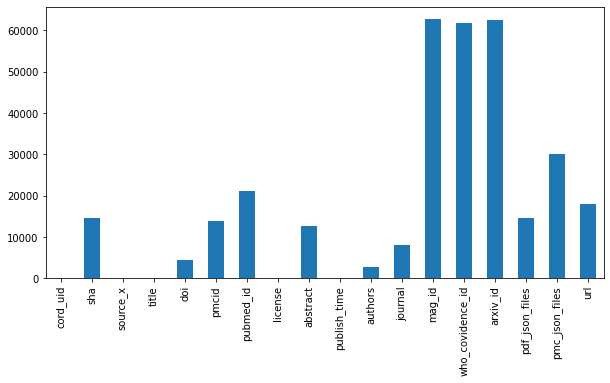

In [4]:
plt.figure(figsize=(10,5))
df.isna().sum().plot(kind='bar', stacked=True)

Se identifican las caracteristicas que tienen valores faltantes de acuerdo con el histograma, a continuación evaluaremos los faltantes y eliminaremos algunos para regular la escala de las frecuencias 

In [5]:
df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url'],
      dtype='object')

In [6]:
df_dropped = df.drop(['who_covidence_id'], axis = 1)

In [7]:
miss = df['abstract'].isna().sum()
print("El número de papers sin abstracts es {:0.0f} que representa {:.2f}% del numero total de papers".format(miss, 100* (miss/df.shape[0])))

El número de papers sin abstracts es 12559 que representa 19.76% del numero total de papers


In [8]:
abstracts_papers = df[df['abstract'].notna()]
print("El número total de papers {:0.0f}".format(abstracts_papers.shape[0]))
missing_doi = abstracts_papers['doi'].isna().sum()
print("El número de papers sin doi es {:0.0f}".format(missing_doi))
missing_url = abstracts_papers['url'].isna().sum()
print("El número de papers sin url es {:0.0f}".format(missing_url))

El número total de papers 51012
El número de papers sin doi es 3645
El número de papers sin url es 14214


In [9]:
abstracts_papers = abstracts_papers[abstracts_papers['publish_time'].notna()]
abstracts_papers['year'] = pd.DatetimeIndex(abstracts_papers['publish_time']).year

In [10]:
missing_url_data = abstracts_papers[abstracts_papers["url"].notna()]
print("El número total de papers con abstracts, urls, pero que les falta doi = {:.0f}".format( missing_url_data.doi.isna().sum()))

El número total de papers con abstracts, urls, pero que les falta doi = 2321


In [11]:
abstracts_papers = abstracts_papers[abstracts_papers["url"].notna()]

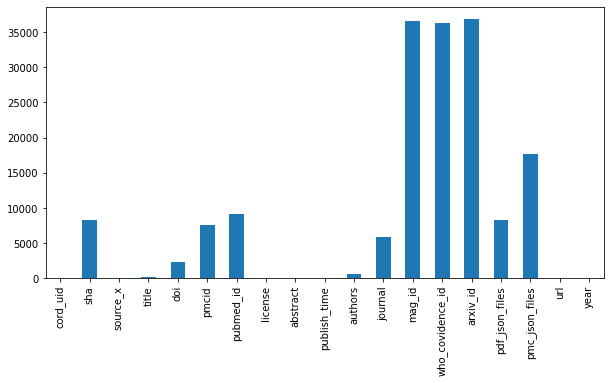

In [12]:
#esquema de los datos 
plt.figure(figsize=(10,5))
abstracts_papers.isna().sum().plot(kind='bar', stacked=True)

In [13]:
abstracts_papers.head()

cord_uid                                       sha source_x  \
0  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
1  ymceytj3  e3d0d482ebd9a8ba81c254cc433f314142e72174      PMC   
2  wzj2glte  00b1d99e70f779eb4ede50059db469c65e8c1469      PMC   
3  2sfqsfm1  cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0      PMC   
4  i0zym7iq  dde02f11923815e6a16a31dd6298c46b109c5dfa      PMC   

                                               title  \
0  Sequence requirements for RNA strand transfer ...   
1  Crystal structure of murine sCEACAM1a[1,4]: a ...   
2  Synthesis of a novel hepatitis C virus protein...   
3  Structure of coronavirus main proteinase revea...   
4  Discontinuous and non-discontinuous subgenomic...   

                        doi      pmcid   pubmed_id   license  \
0  10.1093/emboj/20.24.7220  PMC125340  11742998.0  green-oa   
1   10.1093/emboj/21.9.2076  PMC125375  11980704.0  green-oa   
2  10.1093/emboj/20.14.3840  PMC125543  11447125.0     no-cc   
3      10.1093/emboj/cdf327  PMC126080  12093723.0  green-oa   
4      10.1093/emboj/cdf635  PMC136939  12456663.0  green-oa   

                                            abstract publish_time  \
0  Nidovirus subgenomic mRNAs contain a leader se...   2001-12-17   
1  CEACAM1 is a member of the carcinoembryonic an...   2002-05-01   
2  Hepatitis C virus (HCV) is an important human ...   2001-07-16   
3  The key enzyme in coronavirus polyprotein proc...   2002-07-01   
4  Arteri-, corona-, toro- and roniviruses are ev...   2002-12-01   

                                             authors           journal  \
0  Pasternak, Alexander O.; van den Born, Erwin; ...  The EMBO Journal   
1  Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...  The EMBO Journal   
2  Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...            EMBO J   
3  Anand, Kanchan; Palm, Gottfried J.; Mesters, J...  The EMBO Journal   
4  van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...  The EMBO Journal   

   mag_id who_covidence_id arxiv_id  \
0     NaN              NaN      NaN   
1     NaN              NaN      NaN   
2     NaN              NaN      NaN   
3     NaN              NaN      NaN   
4     NaN              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/b2897e1277f56641193a6...   
1  document_parses/pdf_json/e3d0d482ebd9a8ba81c25...   
2  document_parses/pdf_json/00b1d99e70f779eb4ede5...   
3  document_parses/pdf_json/cf584e00f637cbd8f1bb3...   
4  document_parses/pdf_json/dde02f11923815e6a16a3...   

                                pmc_json_files  \
0  document_parses/pmc_json/PMC125340.xml.json   
1  document_parses/pmc_json/PMC125375.xml.json   
2  document_parses/pmc_json/PMC125543.xml.json   
3  document_parses/pmc_json/PMC126080.xml.json   
4  document_parses/pmc_json/PMC136939.xml.json   

                                                 url  year  
0  http://europepmc.org/articles/pmc125340?pdf=re...  2001  
1  http://europepmc.org/articles/pmc125375?pdf=re...  2002  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  2001  
3  http://europepmc.org/articles/pmc126080?pdf=re...  2002  
4  http://europepmc.org/articles/pmc136939?pdf=re...  2002

In [14]:
#Extraer las columnas de interes
col = ['title','abstract','year','authors','journal']
df = abstracts_papers[col]
df

title  \
0      Sequence requirements for RNA strand transfer ...   
1      Crystal structure of murine sCEACAM1a[1,4]: a ...   
2      Synthesis of a novel hepatitis C virus protein...   
3      Structure of coronavirus main proteinase revea...   
4      Discontinuous and non-discontinuous subgenomic...   
...                                                  ...   
63394  C-E1 Fusion Protein Synthesized by Rubella Vir...   
63395  Genetic Susceptibility to Feline Infectious Pe...   
63426  Delivery to the lower respiratory tract is req...   
63427  Global Transport Networks and Infectious Disea...   
63430  A research agenda for aging in China in the 21...   

                                                abstract  year  \
0      Nidovirus subgenomic mRNAs contain a leader se...  2001   
1      CEACAM1 is a member of the carcinoembryonic an...  2002   
2      Hepatitis C virus (HCV) is an important human ...  2001   
3      The key enzyme in coronavirus polyprotein proc...  2002   
4      Arteri-, corona-, toro- and roniviruses are ev...  2002   
...                                                  ...   ...   
63394  Rubella virus (RUB) replicons are derivatives ...  2006   
63395  Genetic factors are presumed to influence the ...  2013   
63426  Newcastle disease virus (NDV), an avian virus,...  2009   
63427  Air, sea and land transport networks continue ...  2006   
63430  China is encountering formidable healthcare ch...  2015   

                                                 authors  \
0      Pasternak, Alexander O.; van den Born, Erwin; ...   
1      Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...   
2      Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...   
3      Anand, Kanchan; Palm, Gottfried J.; Mesters, J...   
4      van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...   
...                                                  ...   
63394                     Tzeng, Wen-Pin; Frey, Teryl K.   
63395  Golovko, Lyudmila; Lyons, Leslie A.; Liu, Hong...   
63426  DiNapoli, Joshua M.; Ward, Jerrold M.; Cheng, ...   
63427               Tatem, A.J.; Rogers, D.J.; Hay, S.I.   
63430  Fang, Evandro Fei; Scheibye-Knudsen, Morten; J...   

                                                 journal  
0                                       The EMBO Journal  
1                                       The EMBO Journal  
2                                                 EMBO J  
3                                       The EMBO Journal  
4                                       The EMBO Journal  
...                                                  ...  
63394                                           Virology  
63395                                     Virus Research  
63426                                            Vaccine  
63427  Global Mapping of Infectious Diseases: Methods...  
63430                            Ageing Research Reviews  

[36798 rows x 5 columns]

## Preparación de los datos (se remueven signos se puntuación, se convierte todo a minuscula y se hace stemmig y lemma)

In [15]:
def clean_text_round1(text):
    '''make text lowercase, remove punctuation.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

round1 = lambda x: clean_text_round1(str(x))

In [16]:
df.title = df.title.apply(round1)
df.abstract = df.abstract.apply(round1)
df.authors = df.authors.apply(round1)
df.journal = df.journal.apply(round1)
df

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


title  \
0      sequence requirements for rna strand transfer ...   
1      crystal structure of murine sceacam1a14 a coro...   
2      synthesis of a novel hepatitis c virus protein...   
3      structure of coronavirus main proteinase revea...   
4      discontinuous and nondiscontinuous subgenomic ...   
...                                                  ...   
63394  ce1 fusion protein synthesized by rubella viru...   
63395  genetic susceptibility to feline infectious pe...   
63426  delivery to the lower respiratory tract is req...   
63427  global transport networks and infectious disea...   
63430  a research agenda for aging in china in the 21...   

                                                abstract  year  \
0      nidovirus subgenomic mrnas contain a leader se...  2001   
1      ceacam1 is a member of the carcinoembryonic an...  2002   
2      hepatitis c virus hcv is an important human pa...  2001   
3      the key enzyme in coronavirus polyprotein proc...  2002   
4      arteri corona toro and roniviruses are evoluti...  2002   
...                                                  ...   ...   
63394  rubella virus rub replicons are derivatives of...  2006   
63395  genetic factors are presumed to influence the ...  2013   
63426  newcastle disease virus ndv an avian virus is ...  2009   
63427  air sea and land transport networks continue t...  2006   
63430  china is encountering formidable healthcare ch...  2015   

                                                 authors  \
0      pasternak alexander o van den born erwin spaan...   
1      tan kemin zelus bruce d meijers rob liu jinhua...   
2      xu zhenming choi jinah yen tsbenedict lu wen s...   
3      anand kanchan palm gottfried j mesters jeroen ...   
4         van vliet alw smits sl rottier pjm de groot rj   
...                                                  ...   
63394                          tzeng wenpin frey teryl k   
63395  golovko lyudmila lyons leslie a liu hongwei so...   
63426  dinapoli joshua m ward jerrold m cheng lily ya...   
63427                          tatem aj rogers dj hay si   
63430  fang evandro fei scheibyeknudsen morten jahn h...   

                                                 journal  
0                                       the embo journal  
1                                       the embo journal  
2                                                 embo j  
3                                       the embo journal  
4                                       the embo journal  
...                                                  ...  
63394                                           virology  
63395                                     virus research  
63426                                            vaccine  
63427  global mapping of infectious diseases methods ...  
63430                            ageing research reviews  

[36798 rows x 5 columns]

In [17]:
df_abs = df[['abstract']]
df_abs

abstract
0      nidovirus subgenomic mrnas contain a leader se...
1      ceacam1 is a member of the carcinoembryonic an...
2      hepatitis c virus hcv is an important human pa...
3      the key enzyme in coronavirus polyprotein proc...
4      arteri corona toro and roniviruses are evoluti...
...                                                  ...
63394  rubella virus rub replicons are derivatives of...
63395  genetic factors are presumed to influence the ...
63426  newcastle disease virus ndv an avian virus is ...
63427  air sea and land transport networks continue t...
63430  china is encountering formidable healthcare ch...

[36798 rows x 1 columns]

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/jzapatam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jzapatam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jzapatam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#Tokenizar el abstract
df_abs['token_abs'] = df_abs.apply(lambda row: nltk.word_tokenize(str(row['abstract'])), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)
df_abs

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


abstract  \
0      nidovirus subgenomic mrnas contain a leader se...   
1      ceacam1 is a member of the carcinoembryonic an...   
2      hepatitis c virus hcv is an important human pa...   
3      the key enzyme in coronavirus polyprotein proc...   
4      arteri corona toro and roniviruses are evoluti...   
...                                                  ...   
63394  rubella virus rub replicons are derivatives of...   
63395  genetic factors are presumed to influence the ...   
63426  newcastle disease virus ndv an avian virus is ...   
63427  air sea and land transport networks continue t...   
63430  china is encountering formidable healthcare ch...   

                                               token_abs  count_abs  
0      [nidovirus, subgenomic, mrnas, contain, a, lea...        176  
1      [ceacam1, is, a, member, of, the, carcinoembry...        115  
2      [hepatitis, c, virus, hcv, is, an, important, ...        150  
3      [the, key, enzyme, in, coronavirus, polyprotei...        172  
4      [arteri, corona, toro, and, roniviruses, are, ...        178  
...                                                  ...        ...  
63394  [rubella, virus, rub, replicons, are, derivati...        248  
63395  [genetic, factors, are, presumed, to, influenc...        234  
63426  [newcastle, disease, virus, ndv, an, avian, vi...        148  
63427  [air, sea, and, land, transport, networks, con...        140  
63430  [china, is, encountering, formidable, healthca...        154  

[36798 rows x 3 columns]

In [20]:
#Remoción de stopwords de 'abstract' en nltk
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))

def remove_sw (text):
    text = [w for w in text if w not in stop_words_nltk]
    return text

df_abs['token_abs'] = df_abs.apply(lambda row: remove_sw(row['token_abs']), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)
df_abs

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


abstract  \
0      nidovirus subgenomic mrnas contain a leader se...   
1      ceacam1 is a member of the carcinoembryonic an...   
2      hepatitis c virus hcv is an important human pa...   
3      the key enzyme in coronavirus polyprotein proc...   
4      arteri corona toro and roniviruses are evoluti...   
...                                                  ...   
63394  rubella virus rub replicons are derivatives of...   
63395  genetic factors are presumed to influence the ...   
63426  newcastle disease virus ndv an avian virus is ...   
63427  air sea and land transport networks continue t...   
63430  china is encountering formidable healthcare ch...   

                                               token_abs  count_abs  
0      [nidovirus, subgenomic, mrnas, contain, leader...        116  
1      [ceacam1, member, carcinoembryonic, antigen, c...         73  
2      [hepatitis, c, virus, hcv, important, human, p...         93  
3      [key, enzyme, coronavirus, polyprotein, proces...        107  
4      [arteri, corona, toro, roniviruses, evolutiona...        122  
...                                                  ...        ...  
63394  [rubella, virus, rub, replicons, derivatives, ...        156  
63395  [genetic, factors, presumed, influence, incide...        152  
63426  [newcastle, disease, virus, ndv, avian, virus,...         95  
63427  [air, sea, land, transport, networks, continue...         91  
63430  [china, encountering, formidable, healthcare, ...         96  

[36798 rows x 3 columns]

In [21]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemma = WordNetLemmatizer()

In [22]:
def stem_and_lemma(text):
    text = [lancaster.stem(w) for w in text]
    text = [wordnet_lemma.lemmatize(w) for w in text]
    return text

In [23]:
df_abs['token_abs'] = df_abs.apply(lambda row: stem_and_lemma(row['token_abs']), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
 df_abs.head()

abstract  \
0  nidovirus subgenomic mrnas contain a leader se...   
1  ceacam1 is a member of the carcinoembryonic an...   
2  hepatitis c virus hcv is an important human pa...   
3  the key enzyme in coronavirus polyprotein proc...   
4  arteri corona toro and roniviruses are evoluti...   

                                           token_abs  count_abs  
0  [nidovir, subgenom, mrna, contain, lead, sequ,...        116  
1  [ceacam1, memb, carcinoembryon, antig, cea, fa...         73  
2  [hepatit, c, vir, hcv, import, hum, pathog, af...         93  
3  [key, enzym, coronavir, polyprotein, process, ...        107  
4  [arter, coron, toro, ronivirus, evolv, rel, po...        122

In [25]:
#Construcción del diccionario de terminos 
from gensim.corpora import Dictionary 

dictionary = Dictionary(df_abs.token_abs)
len(dictionary)

138987

In [26]:
#libreria: Paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [w for w in df_abs.token_abs])
pool.close()
print(time.time()-t0)

5.785516023635864


## Modelo LDA con Gensim

In [27]:
#Calcula la matriz LDA con los hiperparametros
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=50, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

266.83748626708984


In [28]:
len(doc_term_matrix[0])
len(dictionary)

138987

In [29]:
lda_model[doc_term_matrix[2]]

[(9, 0.09667188),
 (10, 0.029854007),
 (28, 0.06481888),
 (33, 0.06692465),
 (36, 0.05325484),
 (44, 0.6790698)]

In [30]:
# Mostrar los términos y sus pesos de un documento
print(list(lda_model[doc_term_matrix[0]]))

# Mostrar los términos más relevantes de los tópicos más relevantes tópico y sus pesos
print(lda_model.print_topics(num_topics=10, num_words=3))

[(2, 0.39092228), (44, 0.6008678)]
[(44, '0.034*"protein" + 0.025*"vir" + 0.020*"rna"'), (24, '0.016*"hadv" + 0.010*"ro" + 0.010*"rp"'), (13, '0.027*"vir" + 0.011*"cel" + 0.011*"fipv"'), (33, '0.053*"covid19" + 0.034*"sarscov2" + 0.019*"paty"'), (17, '0.030*"plant" + 0.014*"act" + 0.011*"vir"'), (28, '0.042*"inhibit" + 0.028*"drug" + 0.028*"act"'), (49, '0.018*"ca" + 0.013*"covid19" + 0.009*"outbreak"'), (6, '0.058*"de" + 0.049*"la" + 0.023*"en"'), (1, '0.028*"sequ" + 0.016*"u" + 0.014*"analys"'), (12, '0.081*"vaccin" + 0.024*"vir" + 0.019*"immun"')]


In [31]:
!pip install pyLDAvis

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [32]:
#Vizualización de todos los topicos
import pyLDAvis
from pyLDAvis import gensim

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/joblib/externals/loky/backend/resource_tracker.py:101: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/joblib/externals/loky/backend/resource_tracker.py:101: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/joblib/externals/loky/backend/resource_tracker.py:101: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
/Users/jzapatam/.conda/envs/TallerPython/lib/python3.7/site-packages/joblib/externals/loky/backend/resource_trac

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

### Obtener el numero optimo de topicos (K)

In [34]:
import gensim
from gensim import corpora, models, matutils
from gensim.models import CoherenceModel
import os
from gensim.models.wrappers import LdaMallet

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=2, id2word=id2word)
    
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
corpus = [dictionary.doc2bow(df_abs['token_abs']]) for df[['abstract']] in df_abs]

In [35]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':'/Users/jzapatam/Projects/MCDD/ARI/libs/Mallet/'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = '/Users/jzapatam/Projects/MCDD/ARI/libs/Mallet/bin/mallet' 
#You should update this path as per the path of Mallet directory on your system.


In [36]:
# Can take a long time to run.
#id2word = dictionary
#model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df_abs, start=2, limit=50, step=6)
import gensim.corpora as corpora
id2word = corpora.Dictionary(df_abs['token_abs'])

In [37]:
corpus = [id2word.doc2bow(text) for text in df_abs.token_abs]

In [38]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 5), (54, 1), (55, 1), (56, 5), (57, 2), (58, 1), (59, 5), (60, 1), (61, 1), (62, 3), (63, 1), (64, 4), (65, 1), (66, 2), (67, 1), (68, 2), (69, 1), (70, 6), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)]]


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_abs['token_abs'], start=2, limit=50, step=6)



In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
#Guardar la visualización en un archivo HTLM
pyLDAvis.save_html(vis, 'lda_visualization.html')